https://github.com/gilbutITbook/006958/blob/master/deeplearning/deep_code/02_Data_preparation.py

https://github.com/gilbutITbook/006958/blob/master/deeplearning/deep_code/02_Pima_Indian.py

파마 인디언을 대상으로 당뇨병 여부를 측정한 데이터
- pregnant : 과거 임신 횟수
- plasma : 포도당 부하 검사 2시간 후 공복 혈당 농도
- pressure : 확장기 혈압
- thickness : 삼두근 피부 주름 두께
- insulin : 혈청 인슐린
- BMI : 체질량 지수
- pedigree : 당뇨병 가족력
- age : 나이
- class : 당뇨(1), 당뇨 아님(0)

In [2]:
# pandas 라이브러리를 불러옵니다.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 피마 인디언 당뇨병 데이터셋을 불러옵니다. 불러올 때 각 컬럼에 해당하는 이름을 지정합니다.
df = pd.read_csv('C:/dataset/gilbut/pima-indians-diabetes.csv',
               names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])

In [3]:
df.head()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df[['plasma', 'class']]

,plasma,class
0,148,1
1,85,0
2,183,1
3,89,0
4,137,1
...,...,...
763,101,0
764,122,0
765,121,0
766,126,1


In [8]:
# 데이터 가공하기

# 임신 횟수와 당뇨병 발병 확률이 어떤 관계가 있는가 살펴보자.
df[['pregnant', 'class']].groupby(['pregnant'], as_index=False).mean().sort_values(by='pregnant', ascending=True)

,pregnant,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


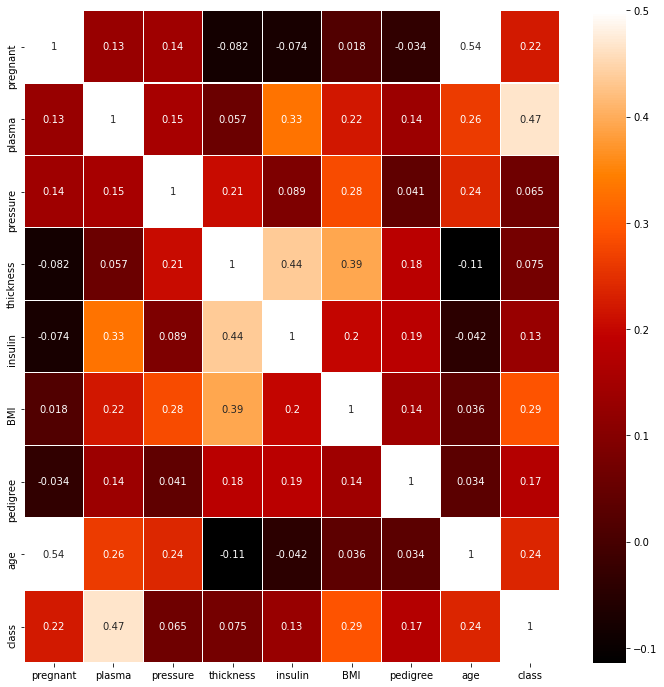

In [9]:
# 데이터 간의 상관관계를 그래프로 표현해 봅니다.

colormap = plt.cm.gist_heat   #그래프의 색상 구성을 정합니다.
plt.figure(figsize=(12,12))   #그래프의 크기를 정합니다.

# 그래프의 속성을 결정합니다. vmax의 값을 0.5로 지정해 0.5에 가까울 수록 밝은 색으로 표시되게 합니다.
sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

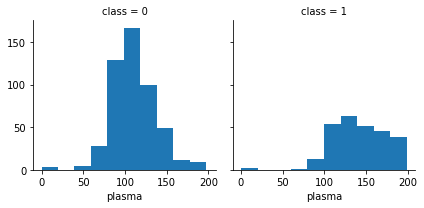

In [10]:
## plasma 항목이 class와 가장 상관관계가 높음
## 따라서 plasma와 class 항목만 따로 떼어 두 항목 간의 관계를 확인해보자.

grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma',  bins=10)
plt.show()

In [ ]:
## 당뇨병 환자의 경우 plasma 항목의 수치가 150이상인 경우가 많음

In [13]:
# 예측 실행

from keras.models import Sequential
from keras.layers import Dense
import numpy

# seed 값 생성
seed = 0
numpy.random.seed(seed)

# 데이터 로드
dataset = numpy.loadtxt("C:/dataset/gilbut/pima-indians-diabetes.csv", delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]


# 모델의 설정
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# 모델 실행
model.fit(X, Y, epochs=200, batch_size=10)

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

tep - loss: 0.9071 - accuracy: 0.6276
Epoch 5/200
77/77 [==============================] - 0s 2ms/step - loss: 0.8612 - accuracy: 0.6641
Epoch 6/200
77/77 [==============================] - 0s 2ms/step - loss: 0.8057 - accuracy: 0.6510
Epoch 7/200
77/77 [==============================] - 0s 2ms/step - loss: 0.7745 - accuracy: 0.6589
Epoch 8/200
77/77 [==============================] - 0s 2ms/step - loss: 0.7361 - accuracy: 0.6589
Epoch 9/200
77/77 [==============================] - 0s 2ms/step - loss: 0.7118 - accuracy: 0.6680
Epoch 10/200
77/77 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.7031
Epoch 11/200
77/77 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.6901
Epoch 12/200
77/77 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.6927
Epoch 13/200
77/77 [==============================] - 0s 2ms/step - loss: 0.7125 - accuracy: 0.6784
Epoch 14/200
77/77 [==============================] - 0s 2ms/step -